<a href="https://colab.research.google.com/github/shirishavissom/Compressive-sensing/blob/main/2D_Compressive_sensing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#COMPRESSIVE SENSING FOR 2D ARRAY 
#DATE : 13-08-2021
#NAME : SHIRISHA 

#INBUILTING LIB
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import scipy.optimize as spopt
import scipy.fftpack as spfft
import scipy.ndimage as spimg
from matplotlib.image import imread
import cvxpy as cvx
import cv2
from sklearn.metrics import mean_squared_error
import imageio

In [ ]:
#DISCRETE COSINE TRANSFORM
def dct2(x):
    return spfft.dct(spfft.dct(x.T, norm='ortho', axis=0).T, norm='ortho', axis=0)

def idct2(x):
    return spfft.idct(spfft.idct(x.T, norm='ortho', axis=0).T, norm='ortho', axis=0)

107 84
[[147 158 211 ... 169 157 161]
 [223 225 206 ... 218 241 231]
 [156 144 170 ... 232 227 182]
 ...
 [ 30  52  23 ...  86 107 120]
 [ 23  41  32 ... 103 135 149]
 [ 39  48  54 ... 120 171 133]]


Text(0, 0.5, 'y scale pixels')

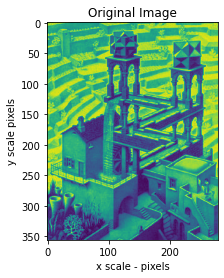

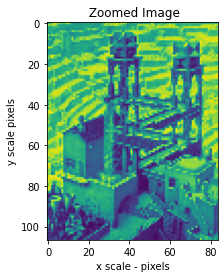

In [ ]:
# read original image and downsize for speed
# img = cv2.imread('/content/Escher_Waterfall.jpg',0) # 0- grayscale , 1 - color, -1 alpha channel
# read an image

#img = imageio.imread('/content/Escher_Waterfall.jpg')
img = cv2.imread('/content/Escher_Waterfall.jpg',0)

#plotting of the image
plt.figure(1)
plt.imshow(np.real(img),cmap='gray')
plt.imshow(np.real(img))
plt.xlabel('x scale - pixels')
plt.ylabel('y scale pixels')
plt.title('Original Image')
# print(type(img))

#Downsize of image
X_input = spimg.zoom(img,0.3)
y = X_input
Orig_Size= img.shape
#print(img.shape)  #- ORIGINAL SIZE
#print(X_input.shape)   # - DOWNSIZED 

ny,nx = X_input.shape
print(ny,nx)
print(X_input)

#plotting the downsized image
plt.figure(2)
#plt.imshow(X_input,cmap=plt.cm.gray)
plt.imshow(X_input)
plt.title(' Zoomed Image')
plt.xlabel('x scale - pixels')
plt.ylabel('y scale pixels')

[4678 2186 7790 ...  720 2346 3094]
[[ 0.01054796 -0.00966286 -0.00239841 ...  0.01088637 -0.0207887
   0.01604631]
 [ 0.01054796  0.00304429 -0.01367451 ... -0.0119406   0.00584794
   0.01432751]
 [ 0.01054796 -0.01229561  0.00535261 ...  0.00855464 -0.00821039
   0.00498043]
 ...
 [ 0.01054796 -0.00999231 -0.00153022 ...  0.00299685 -0.00505125
   0.00377039]
 [ 0.01054796 -0.01455686  0.01349363 ...  0.00932271 -0.0064771
   0.00331869]
 [ 0.01054796 -0.01445493  0.01309716 ...  0.01256793 -0.00883787
   0.00456021]]


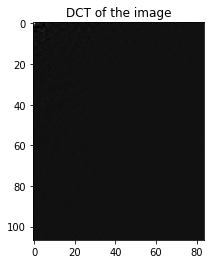

In [ ]:
#Applying DCT to the image
dct_yt = dct2(X_input)
#print(dct_yt)
plt.figure(3)
plt.imshow(dct_yt,cmap=plt.cm.gray)
plt.title('DCT of the image')


# Extracting a  small sample of signal
k = round(nx * ny *1) # 100% sample
#print(k)
ri = np.random.choice(nx * ny, k, replace=False) # random sample of indices
print(ri)
b = X_input.T.flat[ri]
b = np.expand_dims(b, axis=1)  #expands the shape

#  create dct matrix operator using kron (memory errors for large ny*nx)
A = np.kron(
    spfft.idct(np.identity(nx), norm='ortho', axis=0),
    spfft.idct(np.identity(ny), norm='ortho', axis=0)
    )
A = A[ri,:] # same as phi times kron
print(A)

In [ ]:
#Doing L1 optimization for recovery
vx = cvx.Variable(nx * ny)
objective = cvx.Minimize(cvx.norm(vx, 1))
constraints = [A*vx == b[:,0]]
prob = cvx.Problem(objective, constraints)
result = prob.solve(verbose=True)
Xat2 = np.array(vx.value).squeeze()




(36, 28)


Text(0.5, 1.0, 'Reconstructed image')

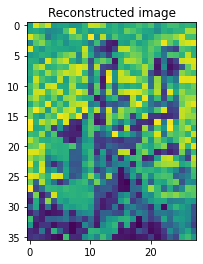

In [ ]:
  # # reconstruct signal
Xat = Xat2.reshape(nx, ny).T # stack columns
Xa = idct2(Xat) 
#print(Xat)
print(np.shape(Xat))
plt.figure(3)
plt.imshow(np.real(Xa))
plt.title('Reconstructed image')

2.2273966917895255e-13


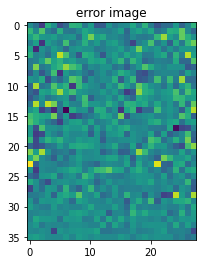

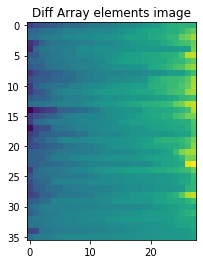

In [ ]:
#PREDICTION OF ORIGINAL AND RECOVERED 
Diff = Xa - X_input
plt.figure(4)
plt.imshow(np.real(Diff))
plt.title('error image')

plt.figure(5)
plt.imshow(np.sort(Diff))
plt.title('Diff Array elements image')

#meansquare error 
def rmse(pred,orig):
     return np.sqrt(np.mean((pred-orig)**2))
rmse1 = rmse(Xa,X_input)
print(rmse1)




In [ ]:
# Extracting a  small sample of signal
k1 = round(nx * ny *0.75) # 75% sample
#print(k)
ri1 = np.random.choice(nx * ny, k1, replace=False) # random sample of indices
print(ri1)
b1 = X_input.T.flat[ri1]
b1 = np.expand_dims(b1, axis=1)  #expands the shape

#  create dct matrix operator using kron (memory errors for large ny*nx)
A1 = np.kron(
    spfft.idct(np.identity(nx), norm='ortho', axis=0),
    spfft.idct(np.identity(ny), norm='ortho', axis=0)
    )
A1 = A1[ri1,:] # same as phi times kron
print(A1)

#Doing L1 optimization for recovery
vx1 = cvx.Variable(nx * ny)
objective1 = cvx.Minimize(cvx.norm(vx, 1))
constraints1 = [A1*vx1 == b1[:,0]]
prob1 = cvx.Problem(objective1, constraints1)
result1 = prob1.solve(verbose=True)
Xat21 = np.array(vx1.value).squeeze()

# # reconstruct signal
Xat1 = Xat21.reshape(nx, ny).T # stack columns
Xa1 = idct2(Xat1)
print(np.shape(Xat1)[0]) 
print(np.shape(Xat1))
plt.figure(3)
#plt.imshow(np.real(Xa))
#plt.title('Reconstructed image')

#meansquare error 
def rmse(pred,orig):
     return np.sqrt(np.mean((pred-orig)**2))
rmse2 = rmse(Xa1,X_input)
print(rmse2)

[ 569  208  618  289  209  141  814  390  915  550  425  640  784  858
  277  517  798  538  180  886  189   34  821  268  384  755   35  675
   14  639  936   60  945   64  887  401  202   12  802   92   27  725
  253  444  287  718   94  854  785   87  186  974  832  770  710  330
  341   99  839  795  463  231  633  555  133  237   77  811  364  332
  782    8  545  288  907  997  647  927  512  754  859  894  348  236
  210  548  525  904  529  252  789  214   63 1005  541  546  442  343
  223   93  301  592   62   33  678  329  486  771  195  931  325  742
  193  704  824  198  368  953  610  114  720  912  884  680  614  474
  966  328  163  670  959  921  712  626   13  916  305  857  969  874
  265  136  283  599   57  841  722  576  586  709 1001  879  124  677
  514  511  406  234  515  388  518  660  702  293  747  339   76  337
  487  352  827   45  885  685  721  965  471  612  215  870   23   39
   61  445  460 1004  503  560  797  696  642  438  882  693  526  597
  251 

<Figure size 432x288 with 0 Axes>

In [ ]:
# Extracting a  small sample of signal
k2 = round(nx * ny *0.5) # 50% sample
#print(k)
ri2 = np.random.choice(nx * ny, k2, replace=False) # random sample of indices
print(ri2)
b2 = X_input.T.flat[ri2]
b2 = np.expand_dims(b2, axis=1)  #expands the shape

#  create dct matrix operator using kron (memory errors for large ny*nx)
A2 = np.kron(
    spfft.idct(np.identity(nx), norm='ortho', axis=0),
    spfft.idct(np.identity(ny), norm='ortho', axis=0)
    )
A2 = A2[ri2,:] # same as phi times kron
print(A2)

#Doing L1 optimization for recovery
vx2 = cvx.Variable(nx * ny)
objective2 = cvx.Minimize(cvx.norm(vx, 1))
constraints2 = [A2*vx2 == b2[:,0]]
prob2 = cvx.Problem(objective2, constraints2)
result2 = prob2.solve(verbose=True)
Xat22 = np.array(vx2.value).squeeze()

# # reconstruct signal
Xat2 = Xat22.reshape(nx, ny).T # stack columns
Xa2 = idct2(Xat2) 
plt.figure(3)
#plt.imshow(np.real(Xa))
#plt.title('Reconstructed image')

#meansquare error 
def rmse(pred,orig):
     return np.sqrt(np.mean((pred-orig)**2))
rmse3 = rmse(Xa2,X_input)
print(rmse3)

[ 934  395  549  762  137  292  385   12   42  765  343  296  298  114
  147  456  675  847  166  422  128  364  757  593  945  341   45  573
  927  512  381  177  439  399  649  684   20  238  504  596  369  349
  999   36  979  701  402  187  231  538  133  627  392  581  336  253
  986  976  479  115  480  957  176  348  709  361  317  879  713 1005
  886  505  334  541  748  895  993  227  670  117  920  207  502  104
  323  226  856  603  195  942  129  544  237   14  183  939  454  287
  301  342  264  235  110  764   89   81   43  358  914  214  520  507
  453  584 1001  804  305  449  521  768  877   47  741  316  776  366
  692  935  564 1006  322   74  722  435  983  987  448  599  901  784
  567  815   84  571  539  781  328  193  687   86  482  885  260  716
  648  871  682  898  135  524  222  528  170  625   34  256  314  497
  451  485  678  230  615  433  622  936   94   54  324  793  767  124
  100  689   50  432  828  434  700  597  424  355  845  257  515  265
  572 

<Figure size 432x288 with 0 Axes>

In [ ]:
# Extracting a  small sample of signal
k3 = round(nx * ny *0.25) # 25% sample
#print(k)
ri3 = np.random.choice(nx * ny, k3, replace=False) # random sample of indices
print(ri3)
b3 = X_input.T.flat[ri3]
b3 = np.expand_dims(b3, axis=1)  #expands the shape

#  create dct matrix operator using kron (memory errors for large ny*nx)
A3 = np.kron(
    spfft.idct(np.identity(nx), norm='ortho', axis=0),
    spfft.idct(np.identity(ny), norm='ortho', axis=0)
    )
A3 = A3[ri3,:] # same as phi times kron
print(A3)

#Doing L1 optimization for recovery
vx3 = cvx.Variable(nx * ny)
objective3 = cvx.Minimize(cvx.norm(vx, 1))
constraints3 = [A3*vx3 == b3[:,0]]
prob3 = cvx.Problem(objective3, constraints3)
result3 = prob3.solve(verbose=True)
Xat23 = np.array(vx3.value).squeeze()

# # reconstruct signal
Xat3 = Xat23.reshape(nx, ny).T # stack columns
Xa3 = idct2(Xat3) 
plt.figure(3)
#plt.imshow(np.real(Xa))
#plt.title('Reconstructed image')

#meansquare error 
def rmse(pred,orig):
     return np.sqrt(np.mean((pred-orig)**2))
rmse4 = rmse(Xa3,X_input)
print(rmse4)

[ 609  425  929  496  440  158  583   46  907   78  933  317  884  431
  438  535    5  304  887  124  554  211  114   85  693  889  841  774
  655  489   94  133  966  965  917   97  558  486  656  479  316  262
  580  739  255  412  821  678  623   24  952  766  196  763  349  251
   67   41  140  332  824  277  384  336  526  408  180  388  783  455
  862  150  509   44  215  574  779  143  189  461  415  991  660  860
  129  474  296  851  483  105  530  692  107  373  865  188  310  711
  985   93  632  825  992  648  302  994  916  492  468  339  604  337
  979  271  993  958  615  626  504  505  426  903  243  563  831  644
  643  557  949  520  460  951  799  814  649  594  411  442  765   38
  752  524  710  988  811  550  498   40  775  376  937  300  379  621
   23 1007  589  605  852  829  749  675  136   25  165  950  187  237
  607  427  249   72  744  320  945  584  240  953  128  962  328  102
  470  871  103  777  413  800  100  904  798  980  898  987  708  602
   34 

<Figure size 432x288 with 0 Axes>

2.2273966917895255e-13 Error with 100%
38.278775601367 Error with 75%
65.7394003279888 Error with 50%
96.17686424870585 Error with 25%
[(36, 28), (36, 28), (36, 28), (36, 28)]


<Figure size 432x288 with 0 Axes>

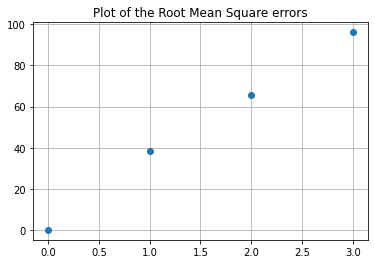

In [ ]:
#plotting here
plt.figure(4)
err1=rmse1
errp75=rmse2
errp5=rmse3
errp25=rmse4
npts=[np.shape(Xat),np.shape(Xat1),np.shape(Xat2),np.shape(Xat3)]
err=[err1,errp75,errp5,errp25]
print(err1,'Error with 100%')
print(errp75,'Error with 75%')
print(errp5,'Error with 50%')
print(errp25,'Error with 25%')
print(npts)
#plt.plot(npts,err,'o')
#plt.xlabel('Number of Points')
#plt.ylabel('RMSE')

# confirm solution
if not np.allclose(X_input.T.flat[ri], Xa.T.flat[ri]):
    print('Warning: values at sample indices don\'t match original.')

# create images of mask (for visualization)
mask = np.zeros(X_input.shape)
mask.T.flat[ri] = 255
Xm = 255 * np.ones(X_input.shape)
Xm.T.flat[ri] = X_input.T.flat[ri]
#mask[i][:,:] = Xm
plt.figure(5)
#plt.plot(Xm.T.flat[ri])
plt.plot(err,'o')
plt.title('Plot of the Root Mean Square errors')
plt.grid()

In [ ]:
## Reconstruction of an image
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import scipy.ndimage as spimg
import scipy.fftpack as spfft
import matplotlib.pyplot as plt
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import scipy.optimize as spopt
import scipy.fftpack as spfft
import scipy.ndimage as spimg
from matplotlib.image import imread
import cvxpy as cvx
import cv2
from sklearn.metrics import mean_squared_error
import imageio
#from pylbfgs import owlqn

plt.close('all')

def dct2(x):
    return spfft.dct(spfft.dct(x.T, norm='ortho', axis=0).T, norm='ortho', axis=0)

def idct2(x):
    return spfft.idct(spfft.idct(x.T, norm='ortho', axis=0).T, norm='ortho', axis=0)



def evaluate(x, g, step):
    """An in-memory evaluation callback."""

    # we want to return two things: 
    # (1) the norm squared of the residuals, sum((Ax-b).^2), and
    # (2) the gradient 2*A'(Ax-b)

    # expand x columns-first
    x2 = x.reshape((nx, ny)).T

    # Ax is just the inverse 2D dct of x2
    Ax2 = idct2(x2)

    # stack columns and extract samples
    Ax = Ax2.T.flat[ri].reshape(b.shape)

    # calculate the residual Ax-b and its 2-norm squared
    Axb = Ax - b
    fx = np.sum(np.power(Axb, 2))

    # project residual vector (k x 1) onto blank image (ny x nx)
    Axb2 = np.zeros(x2.shape)
    Axb2.T.flat[ri] = Axb # fill columns-first

    # A'(Ax-b) is just the 2D dct of Axb2
    AtAxb2 = 2 * dct2(Axb2)
    AtAxb = AtAxb2.T.reshape(x.shape) # stack columns

    # copy over the gradient vector
    np.copyto(g, AtAxb)

    return fx

# fractions of the scaled image to randomly sample at
sample_sizes = (0.5, 0.3)

# read original image
#Xorig = spimg.imread('Sample.png', mode='L')
Xorig = cv2.imread('/content/Escher_Waterfall.jpg',0)
#ny,nx,nchan = Xorig.shape
ny,nx = Xorig.shape

# for each sample size
Z = [np.zeros(Xorig.shape, dtype='uint8') for s in sample_sizes]
masks = [np.zeros(Xorig.shape, dtype='uint8') for s in sample_sizes]
for i,s in enumerate(sample_sizes):

    # create random sampling index vector
    k = round(nx * ny * s)
    ri = np.random.choice(nx * ny, k, replace=False) # random sample of indices

    # for each color channel
    #for j in range(nchan):

    # extract channel
    #X = Xorig[:,:,j].squeeze()
    X = Xorig[:,:].squeeze()

    # create images of mask (for visualization)
    Xm = 255 * np.ones(X.shape)
    Xm.T.flat[ri] = X.T.flat[ri]
    #masks[i][:,:,j] = Xm
    masks[i][:,:] = Xm

    # take random samples of image, store them in a vector b
    b = X.T.flat[ri].astype(float)
      
    #  create dct matrix operator using kron (memory errors for large ny*nx)
    A = np.kron(
    spfft.idct(np.identity(nx), norm='ortho', axis=0),
    spfft.idct(np.identity(ny), norm='ortho', axis=0)
    )
    A = A[ri,:] # same as phi times kron
    #print(A)

    # perform the L1 minimization in memory
    #Xat2 = owlqn(nx*ny, evaluate, None, 5)
    vx = cvx.Variable(nx * ny)
    objective = cvx.Minimize(cvx.norm(vx, 1))
    constraints = [A*vx == b[:,0]]
    prob = cvx.Problem(objective, constraints)
    result = prob.solve(verbose=True)
    Xat2 = np.array(vx.value).squeeze()


    # transform the output back into the spatial domain
    Xat = Xat2.reshape(nx, ny).T # stack columns
    Xa = idct2(Xat)
    #Z[i][:,:,j] = Xa.astype('uint8')
    Z[i][:,:] = Xa.astype('uint8')        



plt.figure(0)
plt.subplot(311)
plt.imshow(Xorig,cmap='gray', interpolation='nearest')
plt.title('Original image')
plt.subplot(312)
plt.imshow(masks[0],cmap='gray', interpolation='nearest')
plt.title('CS image 50% Mask')
plt.subplot(313)
plt.imshow(Z[0],cmap='gray', interpolation='nearest')
plt.title('CS image 50%')
plt.tight_layout()
plt.show()

plt.figure(1)
plt.subplot(311)
plt.imshow(Xorig,cmap='gray', interpolation='nearest')
plt.title('Original image')
plt.subplot(312)
plt.imshow(masks[1],cmap='gray', interpolation='nearest')
plt.title('CS image 30% Mask')
plt.subplot(313)
plt.imshow(Z[1],cmap='gray', interpolation='nearest')
plt.title('CS image 30%')
plt.tight_layout()
plt.show()

plt.figure(2)
plt.subplot(311)
plt.imshow(Xorig,cmap='gray', interpolation='nearest')
plt.title('Original image')
plt.subplot(312)
plt.imshow(masks[2],cmap='gray', interpolation='nearest')
plt.title('CS image 10% Mask')
plt.subplot(313)
plt.imshow(Z[2],cmap='gray', interpolation='nearest')
plt.title('CS image 10%')
plt.tight_layout()
plt.show()

plt.figure(3)
plt.subplot(311)
plt.imshow(Xorig,cmap='gray', interpolation='nearest')
plt.title('Original image')
plt.subplot(312)
plt.imshow(masks[3],cmap='gray', interpolation='nearest')
plt.title('CS image 1% Mask')
plt.subplot(313)
plt.imshow(Z[3],cmap='gray', interpolation='nearest')
plt.title('CS image 1%')
plt.tight_layout()
plt.show()

PLOTTING CO-ORDINATES- GMRT

In [ ]:
!pip install geopandas

     |████████████████████████████████| 1.0 MB 9.9 MB/s 
     |████████████████████████████████| 16.7 MB 3.0 MB/s 


   Sub array no            X            Y            Z
0           NaN          NaN          NaN          NaN
1          C-09  1656798.275  5797375.724  2072950.873
2          C-06  1656876.337  5797380.684  2072875.117
3          c-05  1656778.905  5797416.885  2072851.903
4          C-08  1656597.140  5797507.737  2072743.803
5          C-11  1657434.457  5797240.927  2072820.165
6          C-10  1657033.398  5797460.552  2072528.503
7          C-12  1656714.527  5797569.241  2072479.715
8          C-14  1657338.391  5797389.196  2072484.529
9          C-04  1657350.911  5797103.159  2073269.194
10         C-02  1656807.538  5797062.834  2073812.510
11         W-01  1658292.026  5796606.904  2073899.844
12         W-02  1659636.204  5795953.233  2074646.362
13         W-03  1661515.748  5794833.864  2076257.347
14         W-04  1663118.467  5793591.615  2078425.155
15         W-05  1663862.602  5792476.339  2080919.783
16         W-06  1666782.120  5791234.388  2082032.290
17        

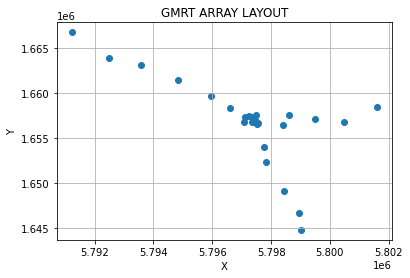

In [ ]:
from shapely.geometry import Point
import pandas as pd   
import geopandas as gpd
from geopandas import GeoDataFrame
import plotly.express as px

df = pd.read_csv("xyz_data.csv", delimiter=',')

#geometry = [Point(xy) for xy in zip(df['Longitude'], df['Latitude'])]
#gdf = GeoDataFrame(df, geometry=geometry)   

#this is a simple map that goes with geopandas
#world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
#gdf.plot(ax=world.plot(figsize=(10, 6)), marker='o', color='red', markersize=15);
#fig = px.scatter_geo(df,lat='Latitude',lon='Longitude')
#fig.update_layout(title = 'GMRT Antenna')
#fig.show()

import matplotlib.pyplot as plt
print(df)
#print(df['Latitude'][1:12])
#plt.scatter(y=df['Latitude'][1:10], x=df['Longitude'][1:10],s = 8)
#plt.scatter(y=df['Latitude'][13:18], x=df['Longitude'][13:18],marker ="s")
#plt.scatter(y=df['Latitude'][19:24], x=df['Longitude'][19:24], marker = "^")
#plt.scatter(y=df['Latitude'][25:30], x=df['Longitude'][25:30], marker = "*")
#plt.scatter(y=df['X'][1:10], x=df['Y'][1:10],s = 8)
#plt.scatter(y=df['X'][11:16], x=df['Y'][11:16],marker ="s")
#plt.scatter(y=df['X'][17:22], x=df['Y'][17:22], marker = "^")
#plt.scatter(y=df['X'][23:28], x=df['Y'][23:28], marker = "*")
plt.scatter(y=df['X'], x=df['Y'])
plt.title('GMRT ARRAY LAYOUT')
plt.xlabel('X')
plt.ylabel('Y')
plt.grid()
plt.show()


In [ ]:
!apt install proj-bin libproj-dev libgeos-dev

Reading package lists... Done
Building dependency tree       
Reading state information... Done
libgeos-dev is already the newest version (3.6.2-1build2).
libgeos-dev set to manually installed.
libproj-dev is already the newest version (4.9.3-2).
libproj-dev set to manually installed.
The following NEW packages will be installed:
  proj-bin
0 upgraded, 1 newly installed, 0 to remove and 39 not upgraded.
Need to get 32.3 kB of archives.
After this operation, 110 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 proj-bin amd64 4.9.3-2 [32.3 kB]
Fetched 32.3 kB in 0s (683 kB/s)
Selecting previously unselected package proj-bin.
(Reading database ... 156210 files and directories currently installed.)
Preparing to unpack .../proj-bin_4.9.3-2_amd64.deb ...
Unpacking proj-bin (4.9.3-2) ...
Setting up proj-bin (4.9.3-2) ...
Processing triggers for man-db (2.8.3-2ubuntu0.1) ...


In [ ]:
!pip install basemap

     |████████████████████████████████| 862 kB 25.0 MB/s 
     |████████████████████████████████| 219 kB 57.7 MB/s 
     |████████████████████████████████| 30.5 MB 1.8 MB/s 
     |████████████████████████████████| 6.3 MB 60.7 MB/s 
  Created wheel for pyshp: filename=pyshp-2.1.3-py3-none-any.whl size=37324 sha256=238ea9b1f9e17085c5a2f4b23964db949a0679fc5176b19b3c9407eac0b713f2
  Stored in directory: /root/.cache/pip/wheels/43/f8/87/53c8cd41545ba20e536ea29a8fcb5431b5f477ca50d5dffbbe
Successfully built pyshp


In [ ]:
from mpl_toolkits.basemap import Basemap
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


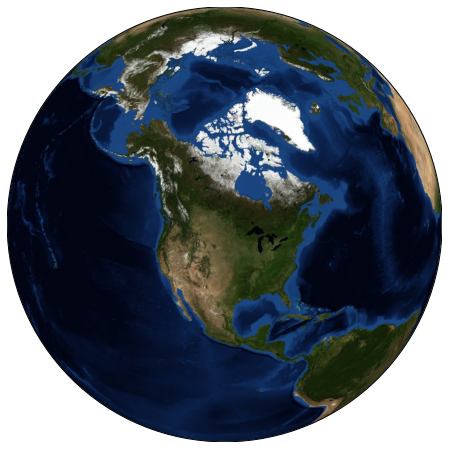

In [ ]:
plt.figure(figsize=(8, 8))
m = Basemap(projection='ortho', resolution=None, lat_0=50, lon_0=-100)
m.bluemarble(scale=0.5);